In [70]:
#same as plot.ipynb but with artificial data

import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib.cm import get_cmap
from matplotlib.lines import Line2D
import pickle
import re

# Path to the folder containing your subfolders
data_path = '../../artificialdata/experiment_2/data'

In [71]:
def get_counts_vector(labels_vector):
    unique_labels, label_counts = np.unique(labels_vector, return_counts=True)
    counts_vector = np.zeros(22, dtype=int)
    counts_vector[unique_labels] = label_counts
    return counts_vector, unique_labels


def get_patient_name(path):
    return re.search(r"/data/\w+/([A-Z]{3})", path).group(1)

def get_class_name(path):
    return re.search(r"/data/(\w+)", path).group(1)

def get_image_number(path):
    print(path)
    return int(re.search(r"image_(\d+).tif", path).group(1))
   

def get_classification_patient(patient_folder):
    probs_path = patient_folder + '/single_cell_probabilities.npy'
    sc_probs = np.load(probs_path)
    sc_class= np.argmax(sc_probs, axis=1)
    return sc_class

'''def save_single_cell_probabilities(data, folder_patient):
    # Create single cell probalities for specific artificial patient
    artificial_folder_path = "../../artificialdata/experiment_3/data/CBFB_MYH11/patient_1"
    with open( os.path.join(artificial_folder_path,"image_file_paths") ,'rb') as fp:
        image_file_paths=pickle.load(fp)

    prev_subtype= get_class_name(image_file_paths[0]) 
    prev_patient = get_patient_name(image_file_paths[0])
    probs_path = data_path +"/"+ prev_subtype +"/"+ prev_patient+'/single_cell_probabilities.npy'

    sc_probs_artificial_list=[]
    for image_path in image_file_paths:
        aml_subtype = get_class_name(image_path)    
        patient = get_patient_name(image_path)   
        image_number = get_image_number(image_path)
        if aml_subtype!=prev_subtype or prev_patient!=patient:
            probs_path = data_path +"/"+ aml_subtype +"/"+ patient+'/single_cell_probabilities.npy'
        prev_patient=patient
        prev_subtype=aml_subtype
        sc_probs = np.load(probs_path)[image_number]
        sc_probs_artificial_list.append([sc_probs])
    sc_probs_artificial = np.concatenate(sc_probs_artificial_list,axis=0)    

    np.save(artificial_folder_path+"/single_cell_probabilities.npy", sc_probs_artificial)'''

def save_single_cell_probabilities(data_folder_real, patient_folder_art):
# Create single cell probabilities for a specific patient
   
    print(patient_folder_art)
    with open(os.path.join(patient_folder_art, "image_file_paths"), 'rb') as fp:
        image_file_paths = pickle.load(fp)

    prev_subtype = get_class_name(image_file_paths[0])
    prev_patient = get_patient_name(image_file_paths[0])
    probs_path = os.path.join(data_folder_real, prev_subtype, prev_patient, 'single_cell_probabilities.npy')

    sc_probs_artificial_list = []

    for image_path in image_file_paths:
        aml_subtype = get_class_name(image_path)
        patient = get_patient_name(image_path)
        image_number = get_image_number(image_path)

        if aml_subtype != prev_subtype or prev_patient != patient:
            probs_path = os.path.join(data_folder_real, aml_subtype, patient, 'single_cell_probabilities.npy')
        print(f"Probspath: ",probs_path, "Patient: ",patient, "image: ", image_number, "AML subtype: ", aml_subtype)
        prev_patient = patient
        prev_subtype = aml_subtype
        sc_probs = np.load(probs_path)[image_number]
        sc_probs_artificial_list.append([sc_probs])

    sc_probs_artificial = np.concatenate(sc_probs_artificial_list, axis=0)

    np.save(os.path.join(patient_folder_art, "single_cell_probabilities.npy"), sc_probs_artificial)



In [72]:
data_path_art = "../../artificialdata/experiment_3/data"
data_path_real="../../data"
for data_folder in os.listdir(data_path_art):
        data_folder_path = os.path.join(data_path_art, data_folder)

        # Check if the item in the directory is a folder
        if os.path.isdir(data_folder_path):
            print(data_folder)
            # Iterate over all patients within each data folder
            for patient_folder in os.listdir(data_folder_path):
              
                patient_folder=os.path.join(data_folder_path,patient_folder)
                print(patient_folder)
                save_single_cell_probabilities(data_path_real, patient_folder)

PML_RARA
../../artificialdata/experiment_3/data/PML_RARA/patient_2
../../artificialdata/experiment_3/data/PML_RARA/patient_2
../../data/CBFB_MYH11/AQK/image_13.tif
Probspath:  ../../data/CBFB_MYH11/AQK/single_cell_probabilities.npy Patient:  AQK image:  13 AML subtype:  CBFB_MYH11
../../data/CBFB_MYH11/AQK/image_13.tif
Probspath:  ../../data/CBFB_MYH11/AQK/single_cell_probabilities.npy Patient:  AQK image:  13 AML subtype:  CBFB_MYH11
../../data/CBFB_MYH11/AQK/image_18.tif
Probspath:  ../../data/CBFB_MYH11/AQK/single_cell_probabilities.npy Patient:  AQK image:  18 AML subtype:  CBFB_MYH11
../../data/CBFB_MYH11/AQK/image_307.tif
Probspath:  ../../data/CBFB_MYH11/AQK/single_cell_probabilities.npy Patient:  AQK image:  307 AML subtype:  CBFB_MYH11
../../data/CBFB_MYH11/AQK/image_334.tif
Probspath:  ../../data/CBFB_MYH11/AQK/single_cell_probabilities.npy Patient:  AQK image:  334 AML subtype:  CBFB_MYH11
../../data/CBFB_MYH11/AQK/image_355.tif
Probspath:  ../../data/CBFB_MYH11/AQK/single_c

PML_RARA
patient_2
../../artificialdata/experiment_3/data/PML_RARA/patient_2/single_cell_probabilities.npy
patient_4
../../artificialdata/experiment_3/data/PML_RARA/patient_4/single_cell_probabilities.npy
patient_1
../../artificialdata/experiment_3/data/PML_RARA/patient_1/single_cell_probabilities.npy
patient_3
../../artificialdata/experiment_3/data/PML_RARA/patient_3/single_cell_probabilities.npy
patient_5
../../artificialdata/experiment_3/data/PML_RARA/patient_5/single_cell_probabilities.npy
CBFB_MYH11
patient_2
../../artificialdata/experiment_3/data/CBFB_MYH11/patient_2/single_cell_probabilities.npy
patient_4
../../artificialdata/experiment_3/data/CBFB_MYH11/patient_4/single_cell_probabilities.npy
patient_1
../../artificialdata/experiment_3/data/CBFB_MYH11/patient_1/single_cell_probabilities.npy
patient_3
../../artificialdata/experiment_3/data/CBFB_MYH11/patient_3/single_cell_probabilities.npy
patient_5
../../artificialdata/experiment_3/data/CBFB_MYH11/patient_5/single_cell_probabil

/tmp/ipykernel_262918/117953453.py:43: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('tab20c', len(unique_labels))


patient_1
../../artificialdata/experiment_3/data/NPM1/patient_1/single_cell_probabilities.npy
patient_3
../../artificialdata/experiment_3/data/NPM1/patient_3/single_cell_probabilities.npy
patient_5
../../artificialdata/experiment_3/data/NPM1/patient_5/single_cell_probabilities.npy
RUNX1_RUNX1T1
patient_2
../../artificialdata/experiment_3/data/RUNX1_RUNX1T1/patient_2/single_cell_probabilities.npy
patient_4
../../artificialdata/experiment_3/data/RUNX1_RUNX1T1/patient_4/single_cell_probabilities.npy
patient_1
../../artificialdata/experiment_3/data/RUNX1_RUNX1T1/patient_1/single_cell_probabilities.npy
patient_3
../../artificialdata/experiment_3/data/RUNX1_RUNX1T1/patient_3/single_cell_probabilities.npy
patient_5
../../artificialdata/experiment_3/data/RUNX1_RUNX1T1/patient_5/single_cell_probabilities.npy
control
patient_2
../../artificialdata/experiment_3/data/control/patient_2/single_cell_probabilities.npy
patient_4
../../artificialdata/experiment_3/data/control/patient_4/single_cell_proba

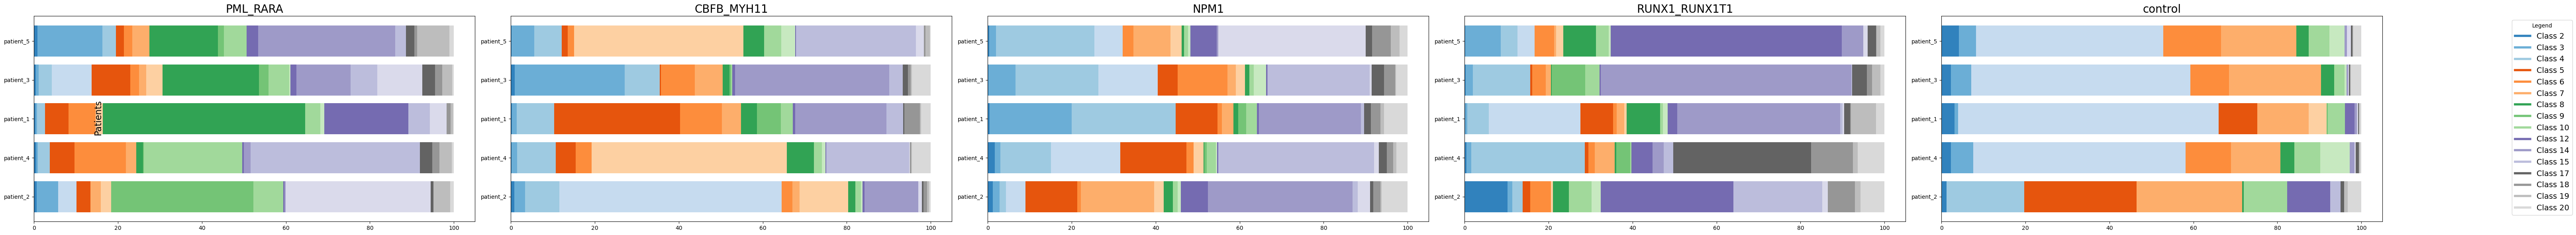

In [75]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.cm import get_cmap

# Assume you have the function get_counts_vector implemented

# Set your data_path variable
data_path = data_path_art

# Initialize figure for subplots
fig, axs = plt.subplots(nrows=1, ncols=len(os.listdir(data_path)), figsize=(12 * len(os.listdir(data_path)), 6), sharey=False)

# Initialize legend elements for the overall plot
legend_elements = []

# Iterate over all subfolders in the data folder
for i, class_folder in enumerate(os.listdir(data_path)):
    print(class_folder)
    class_path = os.path.join(data_path, class_folder)

    # Ensure that the item is a directory
    if os.path.isdir(class_path):
        # Initialize lists to store data for plotting
        patient_folder_names = []
        stacked_counts_vectors = []

        # Iterate over all files in the folder
        for j, patient_folder in enumerate(os.listdir(class_path)):
            print(patient_folder)
            # if len(patient_folder) == 3:
            probs_path = os.path.join(class_path, patient_folder) + '/single_cell_probabilities.npy'
            print(probs_path)
            sc_probs = np.load(probs_path)
            sc_class = np.argmax(sc_probs, axis=1)
            counts_vector, unique_labels = get_counts_vector(sc_class)

            # Normalize counts to percentages
            counts_percentages = counts_vector / np.sum(counts_vector) * 100

            # Create a custom color list for each position
            cmap = get_cmap('tab20c', len(unique_labels))
            colors = [cmap(i) for i in range(len(unique_labels))]

            # Create a horizontal stacked bar plot for each patient in the class
            left = 0
            for label, color in zip(unique_labels, colors):
                axs[i].barh(patient_folder, counts_percentages[label], label=f"Class {label}", alpha=1, color=color, left=left)
                left += counts_percentages[label]

        # Extend the legend elements for the overall plot (outside the patient loop)
        if i == 0:
            legend_elements.extend([Line2D([0], [0], color=color, lw=4, label=f'Class {label}') for label, color in zip(unique_labels, colors)])

        # Set title for each subplot with the name of the folder
        axs[i].set_title(class_folder, fontsize=20)

# Add labels with increased font size
fig.text(0.04, 0.5, "Patients", va='center', rotation='vertical', fontsize=16)

# Create a legend for the overall plot with increased font size
fig.legend(handles=legend_elements, title="Legend", bbox_to_anchor=(1.05, 0.5), loc='center left', fontsize=14)

# Adjust layout and save the overall plot
plt.tight_layout()
plt.savefig('fig3_based_on_scfeatures_art_exp_3.png', bbox_inches='tight')

# Show the plot
plt.show()


PML_RARA
patient_2
../../artificialdata/experiment_3/data/PML_RARA/patient_2/single_cell_probabilities.npy
patient_4
../../artificialdata/experiment_3/data/PML_RARA/patient_4/single_cell_probabilities.npy
patient_1
../../artificialdata/experiment_3/data/PML_RARA/patient_1/single_cell_probabilities.npy
patient_3
../../artificialdata/experiment_3/data/PML_RARA/patient_3/single_cell_probabilities.npy
patient_5
../../artificialdata/experiment_3/data/PML_RARA/patient_5/single_cell_probabilities.npy
CBFB_MYH11
patient_2
../../artificialdata/experiment_3/data/CBFB_MYH11/patient_2/single_cell_probabilities.npy
patient_4
../../artificialdata/experiment_3/data/CBFB_MYH11/patient_4/single_cell_probabilities.npy
patient_1
../../artificialdata/experiment_3/data/CBFB_MYH11/patient_1/single_cell_probabilities.npy
patient_3
../../artificialdata/experiment_3/data/CBFB_MYH11/patient_3/single_cell_probabilities.npy
patient_5
../../artificialdata/experiment_3/data/CBFB_MYH11/patient_5/single_cell_probabil

/tmp/ipykernel_262918/2824657938.py:43: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('tab20c', len(unique_labels))


patient_1
../../artificialdata/experiment_3/data/NPM1/patient_1/single_cell_probabilities.npy
patient_3
../../artificialdata/experiment_3/data/NPM1/patient_3/single_cell_probabilities.npy
patient_5
../../artificialdata/experiment_3/data/NPM1/patient_5/single_cell_probabilities.npy
RUNX1_RUNX1T1
patient_2
../../artificialdata/experiment_3/data/RUNX1_RUNX1T1/patient_2/single_cell_probabilities.npy
patient_4
../../artificialdata/experiment_3/data/RUNX1_RUNX1T1/patient_4/single_cell_probabilities.npy
patient_1
../../artificialdata/experiment_3/data/RUNX1_RUNX1T1/patient_1/single_cell_probabilities.npy
patient_3
../../artificialdata/experiment_3/data/RUNX1_RUNX1T1/patient_3/single_cell_probabilities.npy
patient_5
../../artificialdata/experiment_3/data/RUNX1_RUNX1T1/patient_5/single_cell_probabilities.npy
control
patient_2
../../artificialdata/experiment_3/data/control/patient_2/single_cell_probabilities.npy
patient_4
../../artificialdata/experiment_3/data/control/patient_4/single_cell_proba

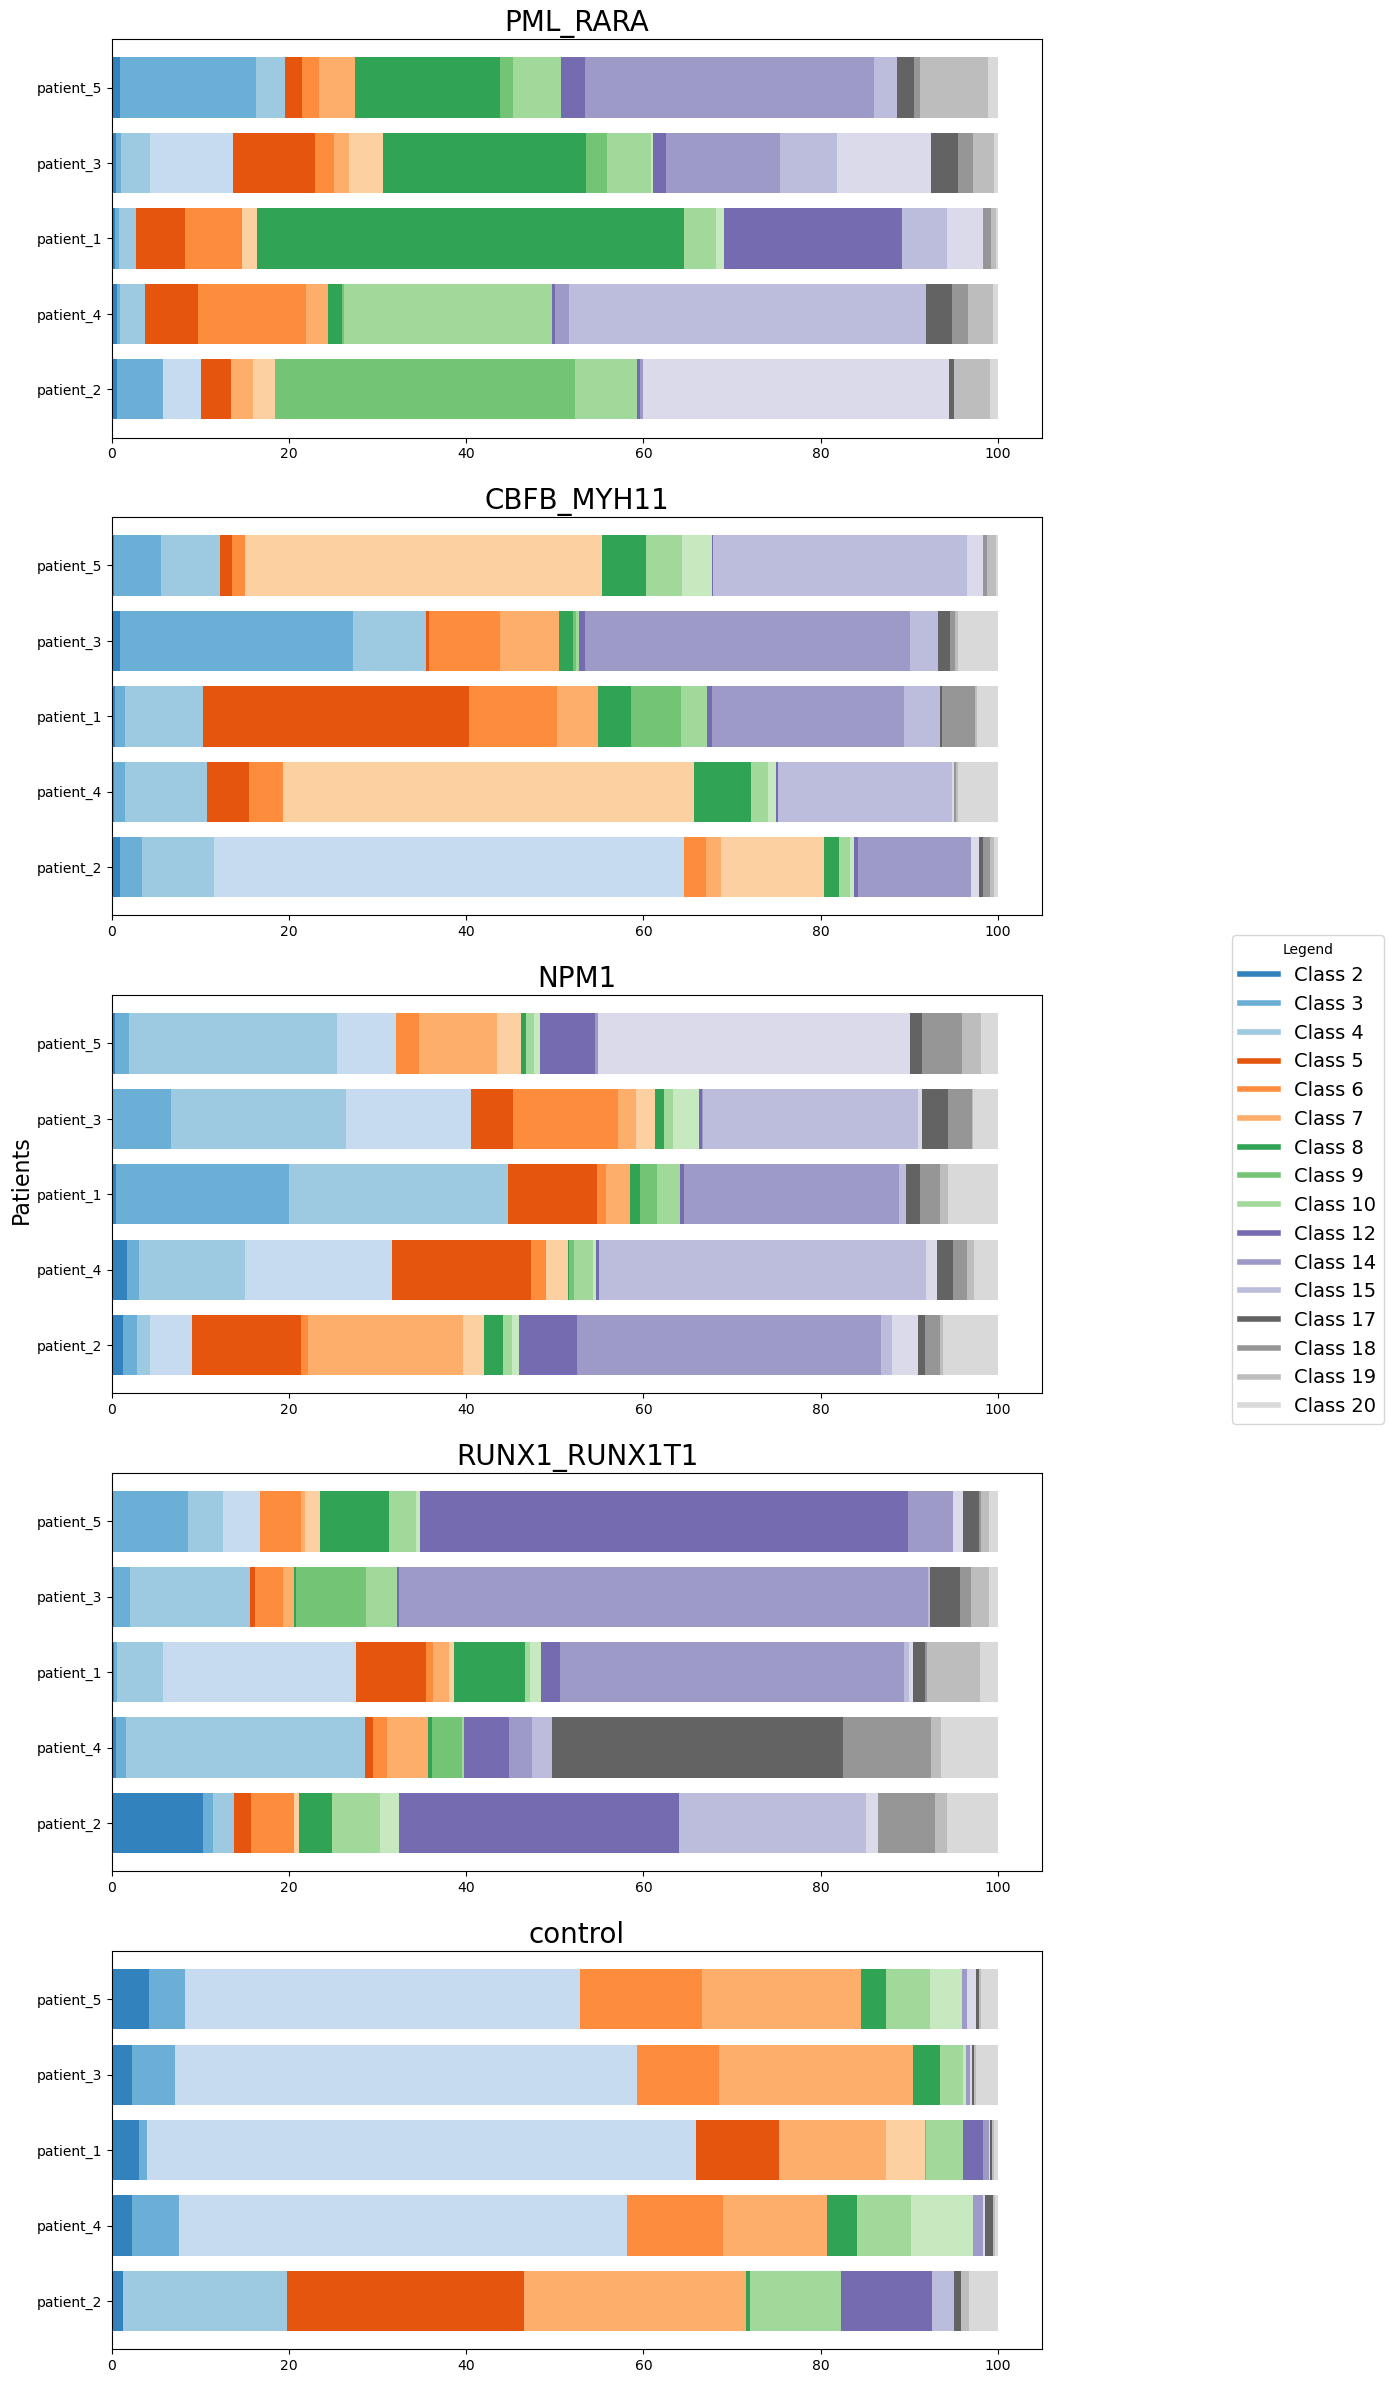

In [77]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.cm import get_cmap

# Assume you have the function get_counts_vector implemented

# Set your data_path variable
data_path = data_path_art

# Initialize figure for subplots
fig, axs = plt.subplots(nrows=len(os.listdir(data_path)), ncols=1, figsize=(12, 6 * len(os.listdir(data_path))), sharey=False)

# Initialize legend elements for the overall plot
legend_elements = []

# Iterate over all subfolders in the data folder
for i, class_folder in enumerate(os.listdir(data_path)):
    print(class_folder)
    class_path = os.path.join(data_path, class_folder)

    # Ensure that the item is a directory
    if os.path.isdir(class_path):
        # Initialize lists to store data for plotting
        patient_folder_names = []
        stacked_counts_vectors = []

        # Iterate over all files in the folder
        for j, patient_folder in enumerate(os.listdir(class_path)):
            print(patient_folder)
            # if len(patient_folder) == 3:
            probs_path = os.path.join(class_path, patient_folder) + '/single_cell_probabilities.npy'
            print(probs_path)
            sc_probs = np.load(probs_path)
            sc_class = np.argmax(sc_probs, axis=1)
            counts_vector, unique_labels = get_counts_vector(sc_class)

            # Normalize counts to percentages
            counts_percentages = counts_vector / np.sum(counts_vector) * 100

            # Create a custom color list for each position
            cmap = get_cmap('tab20c', len(unique_labels))
            colors = [cmap(i) for i in range(len(unique_labels))]

            # Create a horizontal stacked bar plot for each patient in the class
            left = 0
            for label, color in zip(unique_labels, colors):
                axs[i].barh(patient_folder, counts_percentages[label], label=f"Class {label}", alpha=1, color=color, left=left)
                left += counts_percentages[label]

        # Extend the legend elements for the overall plot (outside the patient loop)
        if i == 0:
            legend_elements.extend([Line2D([0], [0], color=color, lw=4, label=f'Class {label}') for label, color in zip(unique_labels, colors)])

        # Set title for each subplot with the name of the folder
        axs[i].set_title(class_folder, fontsize=20)

# Add labels with increased font size
fig.text(0.04, 0.5, "Patients", va='center', rotation='vertical', fontsize=16)

# Create a legend for the overall plot with increased font size
fig.legend(handles=legend_elements, title="Legend", bbox_to_anchor=(1.05, 0.5), loc='center left', fontsize=14)
plt.savefig('fig3_based_on_scfeatures_art_exp_3_hor.png', bbox_inches='tight')
# Adjust layout 
